<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Feature Engineering**

---

## **1. What Is a Feature?**

* A feature is a measurable input used by a model
* Role of features in ML accuracy
* Types: numerical, categorical, text, datetime / timestamps, images, derived, etc.


**Example (pandas):**
```python
import pandas as pd
df = pd.read_csv("data.csv")
df.dtypes
```

---

## **2. Data Cleaning (Foundation of Feature Engineering)**

* Handling missing values: Remove rows, fill using mean/median/mode, use simple models to impute, use domain rules
* Fixing inconsistencies: Incorrect types ("45" → int), bad formatting ("$1,200" → 1200), inconsistent labels ("Male", "male", "M")
* Removing duplicates
* Outlier Handling: Winsorization, capping, log-transform
  
**Code (pandas):**
```python
df = df.drop_duplicates()
df['age'] = df['age'].fillna(df['age'].median())
```

---

## **3. Feature Transformation**

* Scaling: StandardScaler, MinMaxScaler
* Normalization
* Log transforms


**scikit-learn example:**
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['income_scaled']] = scaler.fit_transform(df[['income']])
```

---

## **4. Encoding Categorical Features**

* One-Hot Encoding: multi-class categories
* Label Encoding: ordinal classes / categories, suitable for tree-based models (Random Forest, XGBoost), and target variable (in classification)
* Frequency Encoding: Replaces categories with their frequency
* Target Encoding: Replace category with mean of target. Useful for high-cardinality categorical features.
  
  
**pandas:**
```python
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
```

**scikit-learn:**
```python
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(df[['city']])
```

---

## **5. Feature Creation**

* Binning / Bucketing
* Mathematical Transformations
  * Ratios: `loan_amount / income`
  * Differences: `closing_balance - opening_balance`
  * Multiplications: `quantity * unit_price`
* Polynomial features
* Aggregations
* Interaction Features: combining variables for better signal.
  

**Examples:**
```python
# Binning
df['age_group'] = pd.cut(df['age'], bins=[0,18,35,60,100],
                         labels=['child','youth','adult','senior'])
```

```python
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['salary']])
```

```python
# Mathematical transformations.
df['income_age_interaction'] = df['income'] * df['age']
```

---

## **6. Datetime Feature Engineering**

* Extract year, month, day, hour
* Time since events
* Rolling window features
  
  
**pandas example:**
```python
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
```

---

## **7. Text Feature Engineering**

* Tokenization
* Bag-of-Words
* TF-IDF
  
  
**scikit-learn:**
```python
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)
X = tfidf.fit_transform(df['review'])
```

---

## **8. Feature Selection Techniques**

* Filter methods: Variance Threshold, correlation
* Wrapper methods: RFE
* Embedded: Lasso, Tree-based models
  

**Example:**
```python
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(df_numeric)
```

Tree-based importance:
```python
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X, y)
rf.feature_importances_
```

---

## **9. Best Practices & Workflow**

* Avoid leakage
* Validate with cross-validation
* Keep transformations in pipelines
  
**Pipeline example:**
```python
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', RandomForestClassifier())
])
pipe.fit(X_train, y_train)
```


## **Code Examples of Feature Engineeirng**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub as kh

In [2]:
data_path = kh.dataset_download("amruthayenikonda/dirty-dataset-to-practice-data-cleaning")

Using Colab cache for faster access to the 'dirty-dataset-to-practice-data-cleaning' dataset.


In [3]:
import os

os.listdir(data_path)

['my_file (1).csv']

In [4]:
filename = data_path + "/my_file (1).csv"
df = pd.read_csv(filename)
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [6]:
df_clean = df.dropna(subset=["Peak"], axis=0)
df_clean

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
13,14,1[20],NaN,"$200,000,000","$299,676,265",Cher,Living Proof: The Farewell Tour ‡[21][a],2002–2005,325,"$615,385",[20]
14,15,2[c],NaN,"$194,000,000","$281,617,035",Madonna,Confessions Tour,2006,60,"$3,233,333",[5]


In [7]:
df_clean.fillna(0)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],0,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],0,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
13,14,1[20],0,"$200,000,000","$299,676,265",Cher,Living Proof: The Farewell Tour ‡[21][a],2002–2005,325,"$615,385",[20]
14,15,2[c],0,"$194,000,000","$281,617,035",Madonna,Confessions Tour,2006,60,"$3,233,333",[5]


In [8]:
df.drop_duplicates()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


In [9]:
path = kh.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")
filename = "/multiple_linear_regression_dataset.csv"
df = pd.read_csv(path + filename)
df.head()

Using Colab cache for faster access to the 'multiple-linear-regression-dataset' dataset.


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


### **Standardization**
$\text{Standardization:} \dfrac{x_i - x_{mean}}{std(x)}$

```python
# Standardization with numpy
X_norm = (X - np.mean(X, axis=0)) / np.std(X)
```


### **Normalization**
$\text{Normalization:} \dfrac{x_i - x_{min}}{x_{max} - x_{min}}$

```python
# Normalization with numpy
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X))
```


Categorical

In [12]:
# Categories

# Binary class/category has only two members. E.g. Yes/No, Male/Female, Big/Small
gender = ["Male", "Female"]
X["gender"] = 1 if X["gender"] == "Male" else 0




NameError: name 'X' is not defined

In [11]:
# Non-binary categories have lots of members. E.g. colour (Red, Blue, Green, Yellow, Orange, etc.)
# One-hot encoding

categories = ["Red", "Blue", "Green", "Yellow", "Orange"]
one_hot_vector = [0.0] * len(categories)
one_hot_vector



[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
# Manual One-hot encoding.
x = {}
x["red"] = [1.0, 0.0, 0.0, 0.0, 0.0]
x["blue"] =  [0.0, 1.0, 0.0, 0.0, 0.0]
x["green"] =  [0.0, 0.0, 1.0, 0.0, 0.0]
x["yellow"] =  [0.0, 0.0, 0.0, 1.0, 0.0]
x["orange"] =  [0.0, 0.0, 0.0, 0.0, 1.0]

# Simple way of doing one-hot-encoding
x[color] = one_hot_vector
x[color][categories.index(color)] = 1.0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[['city']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['city']))

In [ ]:
# Manual Label encoding (good for ordinal classes)
x["red"] = 0.0
x["blue"] =  1.0
x["green"] =  2.0
x["yellow"] =  3.0
x["orange"] =  4.0

In [ ]:
# Good example of label encoding is bucketed age groups
{
  "Children": 0,
  "Adults": 1,
  "Seniors": 2,
}


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_label'] = le.fit_transform(df['gender'])


3. Frequency / Count Encoding

Replaces categories with their frequency.

In [ ]:
freq = df['city'].value_counts()
df['city_freq'] = df['city'].map(freq)

In [ ]:
df['city_te'] = df.groupby('city')['target'].transform('mean')

Feature Creation

In [ ]:
# Mathematical
# Ratio
df['debt_to_income'] = df['total_debt'] / df['income']

# Difference

# Product


In [ ]:
# Polynomial Feature

# Distance travelled, d
# d**2
# d**3
# d / time
# d / time**2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['salary']])

In [ ]:
df['income_age_interaction'] = df['income'] * df['age']

In [ ]:
cust_agg = df.groupby('customer_id').agg({
    'amount': ['mean', 'max', 'sum', 'count']
})

In [ ]:
# Moving averages are very useful for timeseries predictions.
df['sales_7day_mean'] = df['sales'].rolling(window=7).mean()
df['sales_7day_std'] = df['sales'].rolling(window=7).std()

# Generate time-series data and plot moving averages and std.

In [ ]:
# Datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5

In [ ]:
df = df.sort_values('date')
df['days_since_last_purchase'] = df['date'].diff().dt.days

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500)
X = cv.fit_transform(df['Tour title'])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 72 stored elements and shape (20, 41)>

In [ ]:
X.shape

(20, 41)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['Tour title'])


In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 72 stored elements and shape (20, 41)>

In [ ]:
from sklearn.feature_selection import VarianceThreshold

df_numeric = df['Actual\xa0gross'].map(lambda x: x.replace(",", "").replace("$", "").replace("[b]", "").replace("[e]", "")).astype(float)
df_numeric = pd.DataFrame(df_numeric)
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(df_numeric)

In [ ]:
X_selected

array([[7.80000000e+08],
       [5.79800000e+08],
       [4.11000000e+08],
       [3.97300000e+08],
       [3.45675146e+08],
       [3.05158363e+08],
       [2.80000000e+08],
       [2.57600000e+08],
       [2.56084556e+08],
       [2.50400000e+08],
       [2.29100000e+08],
       [2.27400000e+08],
       [2.04000000e+08],
       [2.00000000e+08],
       [1.94000000e+08],
       [1.84000000e+08],
       [1.70000000e+08],
       [1.69800000e+08],
       [1.67700000e+08],
       [1.50000000e+08]])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X, y)

NameError: name 'y' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

In [ ]:
path = kh.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")
filename = "/multiple_linear_regression_dataset.csv"
df = pd.read_csv(path + filename)
df.head()

Using Colab cache for faster access to the 'multiple-linear-regression-dataset' dataset.


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

X_train, y_train = df[["age", "experience"]].values, df["income"].values
display(X_train, y_train)

pipe.fit(X_train, y_train)


array([[25,  1],
       [30,  3],
       [47,  2],
       [32,  5],
       [43, 10],
       [51,  7],
       [28,  5],
       [33,  4],
       [37,  5],
       [39,  8],
       [29,  1],
       [47,  9],
       [54,  5],
       [51,  4],
       [44, 12],
       [41,  6],
       [58, 17],
       [23,  1],
       [44,  9],
       [37, 10]])

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

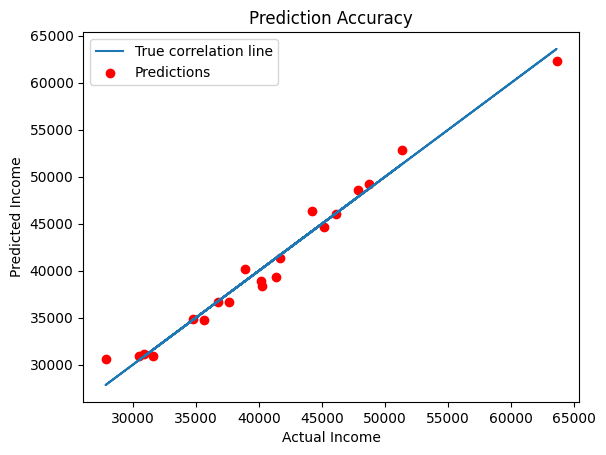

In [ ]:
plt.plot(y_train, y_train, label="True correlation line")
plt.scatter(y_train, pipe.predict(X_train), color="red", label="Predictions")
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Prediction Accuracy")
plt.legend()
plt.show()

---

# **Starter Notebook Template — Feature Engineering & Data Cleaning**

---

## **📌 Setup**

```python
# Install & import required libraries
import pandas as pd
import numpy as np

# Load dataset (upload manually or mount Drive)
df = pd.read_csv('dirtydata.csv')   # replace with actual filename
df.head()
```

---

## **🔍 1. Dataset Overview**

```python
df.info()
df.describe(include='all')
df.head()
```

---

## **📋 2. Column-by-Column Analysis**

Create a table or list describing:

* Column name
* Loaded data type
* Issues found
* Planned feature engineering steps

### Example format (replace with your own findings):

```python
analysis = [
    {
        "column": "Price",
        "dtype": "object",
        "issues": "Contains $, commas, missing values",
        "steps": "Remove symbols, convert to float, impute median"
    },
    {
        "column": "Weight",
        "dtype": "object",
        "issues": "Contains text like '120kg'",
        "steps": "Extract numeric portion and convert to float"
    },
    {
        "column": "Name",
        "dtype": "object",
        "issues": "Includes IDs in parentheses",
        "steps": "Strip out references and standardize formatting"
    }
]

pd.DataFrame(analysis)
```

---

## **🛠️ 3. Feature Engineering & Cleaning Code**

Implement your transformations below.

### Example scaffolding (trainees fill in):

```python
clean_df = df.copy()

# --- Clean currency columns ---
def clean_currency(col):
    return (
        col.astype(str)
           .str.replace('$', '', regex=False)
           .str.replace(',', '', regex=False)
           .str.strip()
           .replace('', np.nan)
           .astype(float)
    )

# Example usage:
# clean_df['Price'] = clean_currency(clean_df['Price'])

# --- Extract numeric values from mixed-type columns ---
def extract_numeric(col):
    return (
        col.astype(str)
           .str.extract(r'(\d+\.?\d*)')[0]
           .astype(float)
    )

# Example usage:
# clean_df['Weight'] = extract_numeric(clean_df['Weight'])

# --- Standardize categorical strings ---
# Example:
# clean_df['Category'] = clean_df['Category'].str.strip().str.lower()

# --- Clean names by removing references ---
# Example:
# clean_df['Name'] = clean_df['Name'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# --- Handle missing values ---
# Example:
# clean_df.fillna({
#     "Price": clean_df["Price"].median(),
#     "Weight": clean_df["Weight"].mean(),
# }, inplace=True)

clean_df.head()
```

---

## **📅 4. Date Cleaning (if applicable)**

```python
# Example:
# clean_df['PurchaseDate'] = pd.to_datetime(clean_df['PurchaseDate'], errors='coerce')
# clean_df['PurchaseDate'].head()
```

---

## **📦 5. Final Cleaned Dataset**

```python
clean_df.info()
clean_df.head()
```

---

## **📝 6. Summary of Cleaning Steps**

Write a short paragraph describing what you cleaned and transformed.

---

## **💾 7. (Optional) Export Cleaned Data**

```python
clean_df.to_csv('cleaned_data.csv', index=False)
```

---